### Let's try some pandas-features with the housing dataset (Seattle)

In [269]:
import numpy as np
import pandas as pd

In [270]:
# load the data
df = pd.read_csv("houses.csv")

In [271]:
# get the first 5 rows
# for amount of data, try just df or len(df)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


**Filtering single rows from the data**

In [272]:
# filter out only one single house with a certain id
# this is mostly needed in ML when we have only a small amount of data
# (e.g. 500 - 1000 rows) and we want to preserve as much as data as possible
# => filter out the problematic individual rows with exact IDs
single_house = df[df['id'] == 3793500160]

In [273]:
# use transpose() to view in vertical format (only works with exactly one row)
single_house.transpose()

,9
id,3793500160
date,20150312T000000
price,323000.00
bedrooms,3
bathrooms,2.50
sqft_living,1890
sqft_lot,6560
floors,2.00
waterfront,0
view,0


In [274]:
# a very practical way to filter individual houses => iloc
# this is a house with index number 13571
single_house = df.iloc[13571]
single_house.to_frame()

,13571
id,1026069061
date,20150129T000000
price,682000.00
bedrooms,4
bathrooms,2.50
sqft_living,3600
sqft_lot,203425
floors,2.00
waterfront,0
view,0


**Finding a certain rows based on a condition (smallest, largest value etc.)**

In [275]:
# finding the most expensive house, get the row
most_expensive = df.loc[df['price'].idxmax()]

# print the whole most_expensive for all info
# most_expensive
most_expensive['id']

np.int64(6762700020)

In [276]:
# finding the most expensive house, get the row
cheapest_house = df.loc[df['price'].idxmin()]
cheapest_house

id                    3421079032
date             20150217T000000
price                   75000.00
bedrooms                       1
bathrooms                   0.00
sqft_living                  670
sqft_lot                   43377
floors                      1.00
waterfront                     0
view                           0
condition                      3
grade                          3
sqft_above                   670
sqft_basement                  0
yr_built                    1966
yr_renovated                   0
zipcode                    98022
lat                        47.26
long                     -121.91
sqft_living15               1160
sqft_lot15                 42882
Name: 1149, dtype: object

**Recommended approach: nlargest() and nsmallest()**

In [277]:
# get the 5 most expensive houses by price
df.nlargest(5, "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3914,9808700762,20140611T000000,7062500.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9254,9208900037,20140919T000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
4411,2470100110,20140804T000000,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
1448,8907500070,20150413T000000,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750


In [278]:
# get the 5 most expensive houses by price
df.nsmallest(5, "price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.00,1,0.00,670,43377,1.00,0,0,...,3,670,0,1966,0,98022,47.26,-121.91,1160,42882
15293,40000362,20140506T000000,78000.00,2,1.00,780,16344,1.00,0,0,...,5,780,0,1942,0,98168,47.47,-122.28,1700,10387
465,8658300340,20140523T000000,80000.00,1,0.75,430,5050,1.00,0,0,...,4,430,0,1912,0,98014,47.65,-121.91,1200,7500
16198,3028200080,20150324T000000,81000.00,2,1.00,730,9975,1.00,0,0,...,5,730,0,1943,0,98168,47.48,-122.31,860,9000
8274,3883800011,20141105T000000,82000.00,3,1.00,860,10426,1.00,0,0,...,6,860,0,1954,0,98146,47.50,-122.34,1140,11250


In [279]:
# get the 5 most expensive houses by price
df.nlargest(5, "sqft_living")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.00,7,8.00,13540,307752,3.00,0,4,...,12,9410,4130,1999,0,98053,47.67,-121.99,4850,217800
7252,6762700020,20141013T000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3914,9808700762,20140611T000000,7062500.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9254,9208900037,20140919T000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
8092,1924059029,20140617T000000,4668000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454


### Basic statistics helper functions

In [280]:
# mean / average
mean_price = df['price'].mean()
int(mean_price)

540088

In [281]:
# mean / average
mean_bedroom_amount = df['bedrooms'].mean()
mean_bedroom_amount

np.float64(3.37084162309721)

In [282]:
# min/max
smallest_price = df['price'].min()
largest_price = df['price'].max()

# print both
print(smallest_price, largest_price)

75000.0 7700000.0


### Easiest way to get all the basic statistics at once => describe()

In [283]:
# override the default scientific notation
# let's force a decimal format, you can control amount of decimals
# by replacing "%.2f" in the lambda
pd.set_option('display.float_format', lambda x: "%.2f" % x)

In [284]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### Quick check: duplicates and missing values

In [285]:
df.duplicated().sum()

np.int64(0)

In [286]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [287]:
houses_2M = df[df['price'] > 2_000_000]
houses_2M

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,20150401T000000,2250000.00,4,3.25,5180,19850,2.00,0,3,...,12,3540,1640,2006,0,98006,47.56,-122.16,3160,9750
246,2025069065,20140929T000000,2400000.00,4,2.50,3650,8354,1.00,1,4,...,9,1830,1820,2000,0,98074,47.63,-122.07,3120,18841
269,7960900060,20150504T000000,2900000.00,4,3.25,5050,20100,1.50,0,2,...,11,4750,300,1982,2008,98004,47.63,-122.22,3890,20060
282,7424700045,20150513T000000,2050000.00,5,3.00,3830,8480,2.00,0,1,...,9,2630,1200,1905,1994,98122,47.62,-122.29,3050,7556
300,3225069065,20140624T000000,3075000.00,4,5.00,4550,18641,1.00,1,4,...,10,2600,1950,2002,0,98074,47.61,-122.08,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310,2154970020,20140703T000000,2351960.00,4,4.25,5010,19412,2.00,0,1,...,11,4000,1010,2014,0,98040,47.55,-122.21,3820,17064
21368,9533100285,20140630T000000,2065000.00,4,3.75,4350,7965,2.00,0,0,...,10,4350,0,2013,0,98004,47.63,-122.20,2190,8557
21506,2524069097,20140509T000000,2238890.00,5,6.50,7270,130017,2.00,0,0,...,12,6420,850,2010,0,98027,47.54,-121.98,1800,44890
21530,8964800330,20150407T000000,3000000.00,4,3.75,5090,14823,1.00,0,0,...,11,4180,910,2013,0,98004,47.62,-122.21,3030,12752


<Axes: >

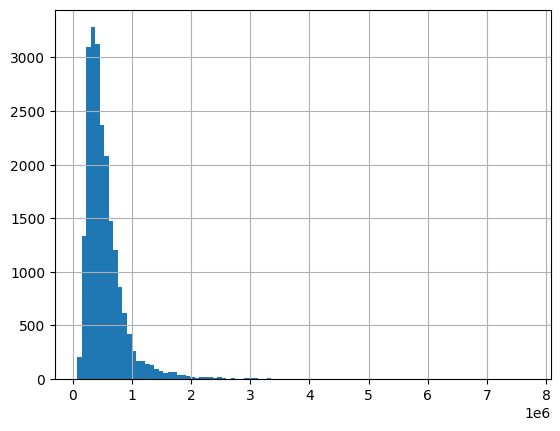

In [288]:
df['price'].hist(bins=100)

In [289]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [290]:
df['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.50       2
6.25       2
7.75       1
7.50       1
Name: count, dtype: int64

In [291]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [292]:
grade_means = df.groupby('grade').mean(numeric_only=True)
grade_means

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,,,,,,
1,3980300371.00,142000.00,0.00,0.00,290.00,20875.00,1.00,0.00,0.00,1.00,290.00,0.00,1963.00,0.00,98024.00,47.53,-121.89,1620.00,22850.00
3,3847882777.67,205666.67,1.00,0.25,596.67,26953.00,1.00,0.00,0.00,3.33,596.67,0.00,1945.33,0.00,98029.67,47.33,-121.88,1163.33,25888.00
4,4324736728.24,214381.03,1.48,0.91,660.48,22101.48,1.03,0.00,0.14,3.10,653.59,6.90,1939.14,68.28,98070.38,47.49,-122.18,1525.17,19950.00
5,3887594134.22,248523.97,2.39,1.11,983.33,24019.91,1.09,0.02,0.14,3.49,944.61,38.72,1935.45,49.32,98082.69,47.50,-122.20,1380.57,16122.43
6,4442552374.57,301919.64,2.69,1.24,1191.56,12646.95,1.11,0.01,0.09,3.54,1068.65,122.91,1942.47,94.60,98102.62,47.53,-122.26,1389.25,11020.92
7,4527762146.04,402590.26,3.26,1.83,1689.40,11766.44,1.30,0.00,0.10,3.49,1408.53,280.87,1963.63,74.56,98082.40,47.55,-122.23,1679.22,10613.52
8,4774398776.81,542852.77,3.48,2.35,2184.75,13510.19,1.67,0.01,0.25,3.36,1867.41,317.34,1980.40,87.29,98073.44,47.57,-122.21,2067.12,11368.63
9,4651165661.19,773513.19,3.77,2.66,2868.14,20638.52,1.85,0.01,0.43,3.27,2554.40,313.74,1988.42,105.62,98065.30,47.58,-122.17,2613.46,17401.71
10,4404625777.70,1071771.07,3.91,3.01,3520.30,28191.06,1.89,0.02,0.65,3.23,3112.09,408.21,1989.57,88.23,98061.30,47.59,-122.15,3036.89,21334.66


In [293]:
houses_2015 = df[df['date'].str.find("2015") >= 0]
houses_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.00,3,2.00,1490,1126,3.00,0,0,...,8,1490,0,2014,0,98144,47.57,-122.29,1400,1230
21606,7936000429,20150326T000000,1007500.00,4,3.50,3510,7200,2.00,0,0,...,9,2600,910,2009,0,98136,47.55,-122.40,2050,6200
21607,2997800021,20150219T000000,475000.00,3,2.50,1310,1294,2.00,0,0,...,8,1180,130,2008,0,98116,47.58,-122.41,1330,1265
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200


### Getting unique values within a column

In [294]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [295]:
df['grade'].nunique()

12

In [296]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [297]:
df2 = df.sort_values("price")
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.00,1,0.00,670,43377,1.00,0,0,...,3,670,0,1966,0,98022,47.26,-121.91,1160,42882
15293,40000362,20140506T000000,78000.00,2,1.00,780,16344,1.00,0,0,...,5,780,0,1942,0,98168,47.47,-122.28,1700,10387
465,8658300340,20140523T000000,80000.00,1,0.75,430,5050,1.00,0,0,...,4,430,0,1912,0,98014,47.65,-121.91,1200,7500
16198,3028200080,20150324T000000,81000.00,2,1.00,730,9975,1.00,0,0,...,5,730,0,1943,0,98168,47.48,-122.31,860,9000
8274,3883800011,20141105T000000,82000.00,3,1.00,860,10426,1.00,0,0,...,6,860,0,1954,0,98146,47.50,-122.34,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
4411,2470100110,20140804T000000,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
9254,9208900037,20140919T000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
3914,9808700762,20140611T000000,7062500.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
